#### Тестовое задание для стажировки в Maxus. Тихонова Полина

### Необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd

from openpyxl import load_workbook
import matplotlib.pyplot as plt
% matplotlib inline

import xlwt

### Исходные данные

In [2]:
data = pd.ExcelFile("data.xlsx").parse("Заказы")
data['% Маржи'] = np.divide(data[[5]], data[[3]])*100
print(data.shape)
data.head()

(1029, 7)


,ID,Сайт/Телефон,Канал,Цена,Оплачено,Маржа,% Маржи
0,1002250907,Website,partner,99706,0,11765,11.799691
1,1002250912,Website,Organic,28321,28321,2536,8.954486
2,1002250913,Website,AF,44777,44777,5284,11.800701
3,1002250917,Phone,Direct,21951,0,2590,11.799007
4,1002250923,Website,Organic,37013,0,4368,11.801259


### Вычисления

Для некоторых вопросов результаты получаются нерепрезентативными, поскольку по некоторым каналам проходил только один заказ.
В таких случаях, я проделывала те же вычисления, но исключала каналы, по котороым проходил только 1 заказ.

In [3]:
uni_web = np.unique(data[[1]])
uni_canal = np.unique(data[[2]])

info = pd.DataFrame()
info['Канал'] = uni_canal
info['# заказов'] = [np.sum(data['Канал']==i) for i in uni_canal]
info

,Канал,# заказов
0,AF,354
1,Direct,125
2,Organic,355
3,fb,1
4,google,133
5,newsletter,59
6,partner,1
7,vk,1


In [4]:
ans1 = np.mean(data[[3]])
ans2 = np.mean(data[data[[4]]!=0][[4]])
ans3 = np.mean(data.loc[data['Сайт/Телефон']=="Website"][[6]])
ans4a = 100*np.sum(data[[4]]!=0)/data.shape[0]
ans4b = 100*np.mean([np.sum(data.loc[data['Сайт/Телефон']==i][[4]]!=0)/data.loc[data['Сайт/Телефон']==i].shape[0] for i in uni_web])
ans4c = 100*np.mean([np.sum(data.loc[data['Канал']==i][[4]]!=0)/data.loc[data['Канал']==i].shape[0] for i in uni_canal])

revenue = np.array([np.sum(data.loc[(data['Канал']==i) & (data['Оплачено']!=0)][[5]]) for i in uni_canal])
ans5 = (uni_canal[(revenue == np.amax(revenue)).reshape(1,-1)[0]][0], np.amax(revenue))

revenue = np.array([np.mean(data.loc[(data['Канал']==i)][[3]]) for i in uni_canal])
revenue_fixed = revenue[np.array((info[[1]]>1)).flatten()].flatten()
ans6a = (uni_canal[(revenue == np.amax(revenue)).reshape(1,-1)[0]][0], np.amax(revenue))
ans6b = (uni_canal[(revenue == np.amax(revenue_fixed)).reshape(1,-1)[0]][0], np.amax(revenue_fixed))

revenue = np.array([np.sum([(data['Канал']==i) & (data['Сайт/Телефон']=="Phone")]) for i in uni_canal])
revenue = np.array(np.divide(revenue, info['# заказов']))
revenue_fixed = revenue[np.array((info[[1]]>1)).flatten()].flatten()
ans7a = (uni_canal[(revenue == np.amax(revenue)).reshape(1,-1)[0]][0], np.amax(revenue))
ans7b = (uni_canal[(revenue == np.amax(revenue_fixed)).reshape(1,-1)[0]][0], np.amax(revenue_fixed))

mean_gross = [np.mean(data.loc[data['Сайт/Телефон']==i][[5]]) for i in uni_web]
ans8 = (abs(mean_gross[0]-mean_gross[1]), uni_web[(mean_gross==np.amax(mean_gross)).flatten()][0])

ans9 = np.sum(np.array(data[[4]])>np.array(data[[3]]))

### Результаты

In [5]:
print('1. Средняя цена заказа = %0.2f руб.'% ans1)
print('2. Средняя сумма оплаченного заказа = %0.2f руб.'% ans2)
print('3. Средний процент маржи оплаченного заказа = %0.2f%s'% (ans3, "%"))
print("4а. Конверсия из заказа в оплату = %0.2f%s"%(ans4a, "%")+
      "\n4б. Конверсия из заказа в оплату средняя cайт/телефон = %0.2f%s"%(ans4b, "%")+
     "\n4в. Конверсия из заказа в оплату средняя по каналам = %0.2f%s" %(ans4c, "%"))
print("5. Канал с самой большой чистой прибылью - %s, прибыль = %0.2f руб." %ans5)
print("6а. Канал с самым высоким средним чеком заказа - %s, чек = %0.2f руб."% ans6a +
     "\n6б. Канал с самым высоким средним чеком заказа среди каналов с заказами > 1 - %s, чек = %0.2f руб." % ans6b)
print("7а. Канал с самой высокой долей заказов через телефон - %s, доля = %0.2f"  % ans7a +
     "\n7б. Канал с самой высокой долей заказов через телефон среди каналов с заказами > 1 - %s, доля = %0.2f"  % ans7b)
print('8. Разница в маржинальности заказов с сайта и с телефона = %0.2f руб.\n   Маржинальность больше у заказов через %s'% ans8)
print('9. Количество заказов, в которых оплата была произведена на большую сумму - %d.'%ans9)

1. Средняя цена заказа = 52945.51 руб.
2. Средняя сумма оплаченного заказа = 44178.95 руб.
3. Средний процент маржи оплаченного заказа = 10.30%
4а. Конверсия из заказа в оплату = 34.31%
4б. Конверсия из заказа в оплату средняя cайт/телефон = 34.27%
4в. Конверсия из заказа в оплату средняя по каналам = 22.89%
5. Канал с самой большой чистой прибылью - Organic, прибыль = 571742.00 руб.
6а. Канал с самым высоким средним чеком заказа - partner, чек = 99706.00 руб.
6б. Канал с самым высоким средним чеком заказа среди каналов с заказами > 1 - Direct, чек = 61856.45 руб.
7а. Канал с самой высокой долей заказов через телефон - fb, доля = 1.00
7б. Канал с самой высокой долей заказов через телефон среди каналов с заказами > 1 - Direct, доля = 0.41
8. Разница в маржинальности заказов с сайта и с телефона = 174.48 руб.
   Маржинальность больше у заказов через Website
9. Количество заказов, в которых оплата была произведена на большую сумму - 9.


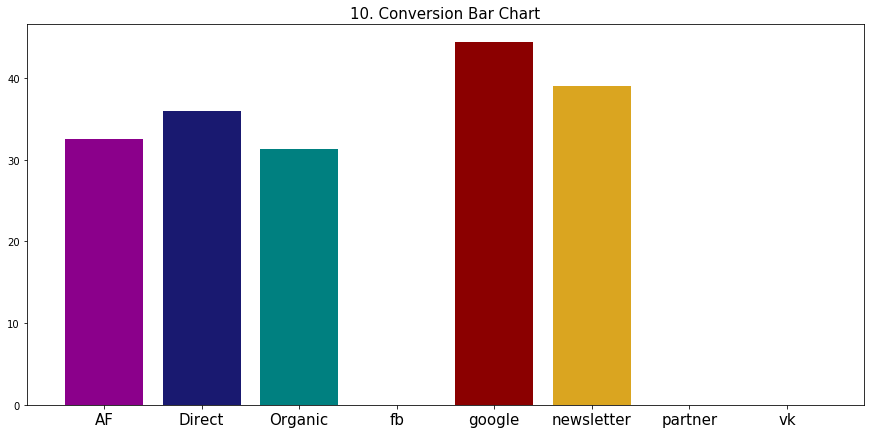

In [6]:
plt.figure(figsize = (15,7))
conv = [100*np.sum(np.array(data.loc[data['Канал']==i][[4]]!=0)/data.loc[data['Канал']==i].shape[0]) for i in uni_canal]
plt.bar(list(range(len(conv))), conv, color = ['darkmagenta', 'midnightblue', 'teal', 'b', 'darkred', 'goldenrod', 'r', 'y'])
plt.xticks(list(range(len(conv))), uni_canal, fontsize = 15)
plt.title("10. Conversion Bar Chart", fontsize = 15)
plt.show()